<a href="https://colab.research.google.com/github/goldenbear7/DS-Unit-1-Sprint-2-Statistics/blob/master/Bjorn_Lestrud_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind, t

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
columns = ['Class Name', 'Handicapped Infants', 'Water Project Cost sharing', 'Adoption of the Budget Resolution', 'Physician Fee Freeze', 'El Salvador Aid', 
           'Religious Groups in Schools', 'Anti-satellite Test Ban', 'Aid to Nicaraguan Contras', 'Mx Missile', 'Immigration', 'Synfuels Corporation Cutback', 
          'Education Spending', 'Superfund Right to Sue', 'Crime', 'Duty Free Exports', 'Export Administration Act South Africa']

voting = pd.read_csv('house-votes-84.csv', names = columns)
voting

,Class Name,Handicapped Infants,Water Project Cost sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [32]:
voting1 = voting.replace('?',np.nan )
voting1

,Class Name,Handicapped Infants,Water Project Cost sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [15]:
better_voting = voting1.replace({'y':1, 'n':0})
better_voting

,Class Name,Handicapped Infants,Water Project Cost sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


s = standard deviation of the sample
n = sample size
t = test statistic
X = sample mean

As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.

In [0]:
import scipy.stats as stats

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
  return (mean, mean-moe, mean+moe)

In [18]:
rep = better_voting[better_voting['Class Name']=='republican']
len(rep)

168

In [19]:
dem = better_voting[better_voting['Class Name']=='democrat']
len(dem)

267

In [20]:
ttest_ind(rep['Handicapped Infants'], dem['Handicapped Infants'], nan_policy='omit')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)

In [0]:
# stats.t.ppf(# probability cutoff, # degrees of freedom)

# 95% confidence level -> .025

# 1 - confidence_level == .05 / 2 -> .025

In [66]:
sample_means = dem.mean()
dem.mean()

Handicapped Infants                       0.604651
Water Project Cost sharing                0.500000
Adoption of the Budget Resolution         0.893701
Physician Fee Freeze                      0.055336
El Salvador Aid                           0.217742
Religious Groups in Schools               0.480000
Anti-satellite Test Ban                   0.769841
Aid to Nicaraguan Contras                 0.831373
Mx Missile                                0.758333
Immigration                               0.468750
Synfuels Corporation Cutback              0.500000
Education Spending                        0.144033
Superfund Right to Sue                    0.285714
Crime                                     0.344000
Duty Free Exports                         0.640816
Export Administration Act South Africa    0.939560
dtype: float64

In [68]:
# Sample Size
n = len(sample_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(sample_means)
# Sample Standard Deviation
sample_std=np.std(sample_means, ddof=1)
# Standard Error
std_err = sample_std/np.sqrt(n)

CI = t.interval(.95, dof, mean, std_err)
CI

(0.3833199617508558, 0.6709114107323739)

In [0]:
dem_freeze = better_voting.dropna()

In [81]:
dem_freeze.shape

(232, 17)

In [87]:
confidence_interval(dem_freeze['Handicapped Infants'], confidence=0.95)

(0.41379310344827586, 0.34994610096505746, 0.47764010593149425)

In [88]:
confidence_interval(sample_means)

(0.5271156862416149, 0.3833199617508558, 0.6709114107323739)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

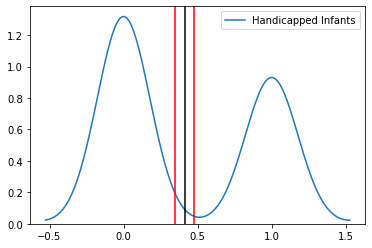

In [85]:
# This shows me how democrats vote on Handicapped Infants.

# kernel density estimate
sns.kdeplot(dem_freeze['Handicapped Infants']);
CI = confidence_interval(dem_freeze['Handicapped Infants'])
plt.axvline(x=CI[1], color='red'); # lower bound
plt.axvline(x=CI[2], color='red'); # upper bound
plt.axvline(x=CI[0], color='black'); # mean

I am 95% certain that between 34.99% and 47.78% of democrats will vote for the Handicapped Infants.


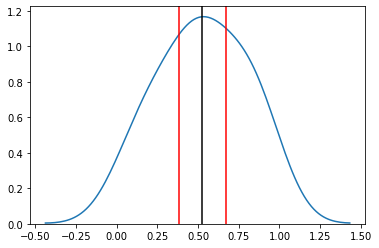

In [86]:
# This shows me democrats as a whole and how they vote on issues across the board.

# plot that
# kernel density estimate
sns.kdeplot(sample_means);
CI = confidence_interval(sample_means)
plt.axvline(x=CI[1], color='red'); # lower bound
plt.axvline(x=CI[2], color='red'); # upper bound
plt.axvline(x=CI[0], color='black'); # mean

This is a much more normal distribution, likely because we are working across a wider array of issues.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)